# Reaction Time Analysis


## Study
### Description
In a short experiment users' reaction time to pre-attentive and attentive stimuli was recorded.
A participant was shown 40 stimuli of either a red or blue square or an even or odd number.
Based on the shown picture a button had to be pressed. Half of the shown pictures were presented with a visual distraction
in order to examine its effect on the user. Reaction times were measured from the first time the stimulus was shown to the button press.
In between shown stimuli a one seconds pause was added. A MacBook Pro 2016 13 inch was used to run the study and record the data. 

### Participants
The study was conducted with 4 media informatics students. The VR04 lab, located in the Techbase Regensburg, was the experiments location
for 3 of them, while the last run was dont at the participants private home.


In [92]:
# import libs
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams  


## Reading the data
As a first step we import the logged data from "reaction_time_results.csv" which contains data for all 4 participants.


In [93]:
# read CSV
full_data = pd.read_csv("reaction_time_results.csv", delimiter = ";")

# get data for every participant
data_AD = full_data[(full_data["stimulus"] == "AD")]
data_AN = full_data[(full_data["stimulus"] == "AN")]
data_PD = full_data[(full_data["stimulus"] == "PD")]
data_PN = full_data[(full_data["stimulus"] == "PN")]


## Plotting the data
### All conditions combined
For the first data analysis we want to plot all 4 participants on a scatter plot


In [94]:
# plot configurations
%matplotlib inline
rcParams['figure.figsize'] = (16,9)

# get y axis length
ordinate = range(len(data_AD))


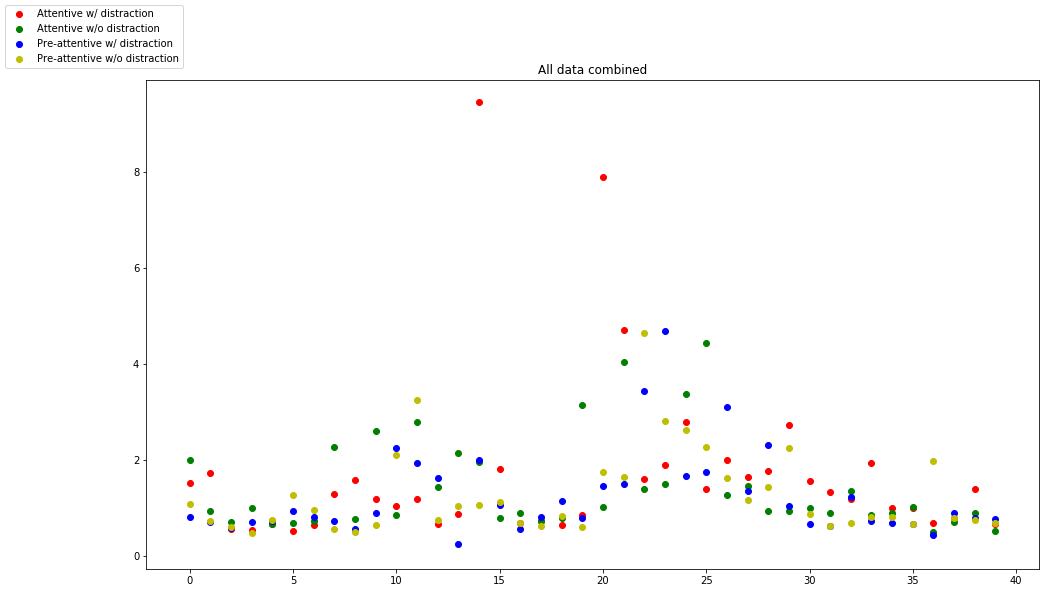

In [95]:
# draw graph
# https://stackoverflow.com/questions/4270301/matplotlib-multiple-datasets-on-the-same-scatter-plot
graph = plt.figure()
plot_whole = graph.add_subplot(111)

# add data for each participant
plot_whole.scatter(ordinate, list(data_AD["reaction_time"]), c="r", label="Attentive w/ distraction")
plot_whole.scatter(ordinate, list(data_AN["reaction_time"]), c="g", label="Attentive w/o distraction")
plot_whole.scatter(ordinate, list(data_PD["reaction_time"]), c="b", label="Pre-attentive w/ distraction")
plot_whole.scatter(ordinate, list(data_PN["reaction_time"]), c="y", label="Pre-attentive w/o distraction")
plot_whole.title.set_text("All data combined")
# show legend
graph.legend(loc="upper left")


### Each condition separate


(0, 10.451802015)

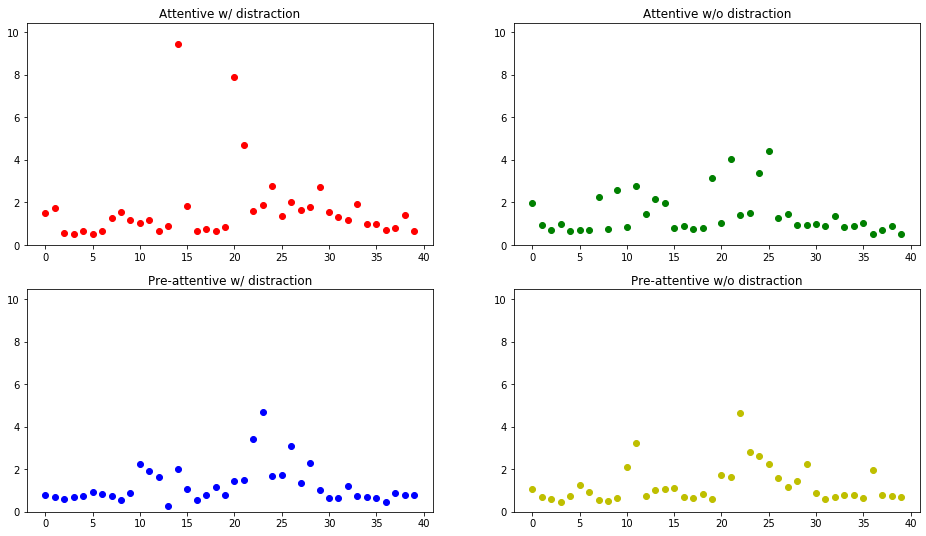

In [96]:
# create new figure with 4 subplots on a 2x2 grid
graph2 = plt.figure()

# norm all the y-axes
ymax = full_data["reaction_time"].max() + 1

# draw graphs
plot_11 = graph2.add_subplot(221)
plot_11.scatter(ordinate, list(data_AD["reaction_time"]), c="r") 
plot_11.title.set_text("Attentive w/ distraction")
plot_11.set_ylim([0, ymax])

plot_12 = graph2.add_subplot(222)
plot_12.scatter(ordinate, list(data_AN["reaction_time"]), c="g")
plot_12.title.set_text("Attentive w/o distraction")
plot_12.set_ylim([0, ymax])

plot_21 = graph2.add_subplot(223)
plot_21.scatter(ordinate, list(data_PD["reaction_time"]), c="b")
plot_21.title.set_text("Pre-attentive w/ distraction")
plot_21.set_ylim([0, ymax])

plot_22 = graph2.add_subplot(224)
plot_22.scatter(ordinate, list(data_PN["reaction_time"]), c="y")
plot_22.title.set_text("Pre-attentive w/o distraction")
plot_22.set_ylim([0, ymax])
